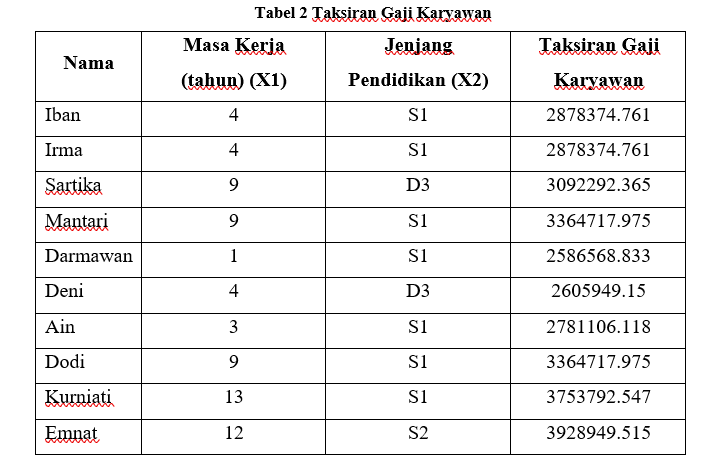

In [ ]:
# Membuat tabel dari foto di atas
import pandas as pd
data = {
    'Nama':['Iban','Irma','Sartika','Mantari','Darmawan','Deni','Ain','Dodi',
            'Kurniati','Emnat'],
    'Masa Kerja':[4,4,9,9,1,4,3,9,13,12],
    'Pendidikan':['S1','S1','D3','S1','S1','D3','S1','S1','S1','S2'],
    'Gaji':[2878374.761,2878374.761,3092292.365,3364717.975,2586568.833,
            2605949.15,2781106.118,3364717.975,3753792.547,3928949.515]
}
df = pd.DataFrame(data)
df

,Nama,Masa Kerja,Pendidikan,Gaji
0,Iban,4,S1,2878374.761
1,Irma,4,S1,2878374.761
2,Sartika,9,D3,3092292.365
3,Mantari,9,S1,3364717.975
4,Darmawan,1,S1,2586568.833
5,Deni,4,D3,2605949.150
6,Ain,3,S1,2781106.118
7,Dodi,9,S1,3364717.975
8,Kurniati,13,S1,3753792.547
9,Emnat,12,S2,3928949.515


In [ ]:
# Mengonversi data kualitatif pendidikan menjadi data kuantitatif
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Pendidikan'] = label_encoder.fit_transform(df['Pendidikan'])
df

,Nama,Masa Kerja,Pendidikan,Gaji
0,Iban,4,1,2878374.761
1,Irma,4,1,2878374.761
2,Sartika,9,0,3092292.365
3,Mantari,9,1,3364717.975
4,Darmawan,1,1,2586568.833
5,Deni,4,0,2605949.150
6,Ain,3,1,2781106.118
7,Dodi,9,1,3364717.975
8,Kurniati,13,1,3753792.547
9,Emnat,12,2,3928949.515


In [ ]:
# Analisa regresi
import statsmodels.api as sm

# Menentukan variabel independen dan dependen
X = df[['Masa Kerja','Pendidikan']]
y = df['Gaji']

# Menambahkan kolom konstanta untuk intercept
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Gaji   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.297e+18
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           7.64e-65
Time:                        19:11:59   Log-Likelihood:                 66.718
No. Observations:                  10   AIC:                            -127.4
Df Residuals:                       7   BIC:                            -126.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.217e+06      0.000   8.11e+09      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.08, 'Scatter Plot')

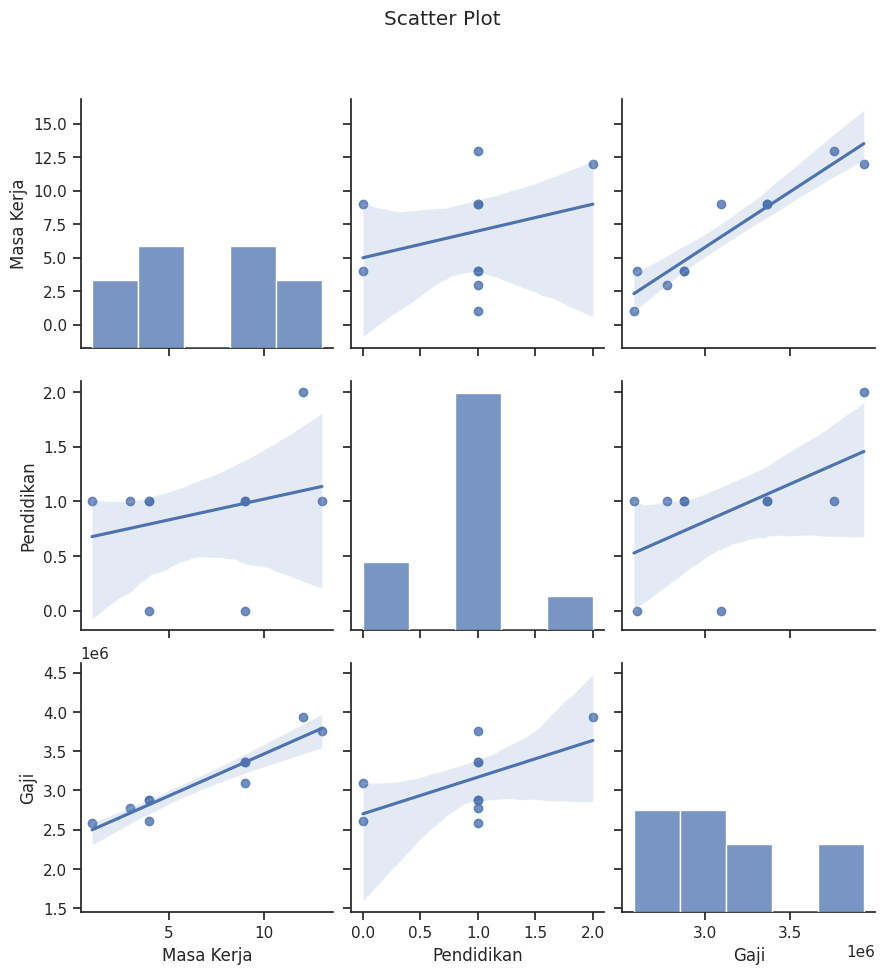

In [ ]:
# Uji Asumsi Linearitas
import seaborn as sns

sns.set(style='ticks', color_codes=True, font_scale=1)
g=sns.pairplot(df, height=3, diag_kind='hist', kind='reg')
g.fig.suptitle('Scatter Plot', y=1.08)

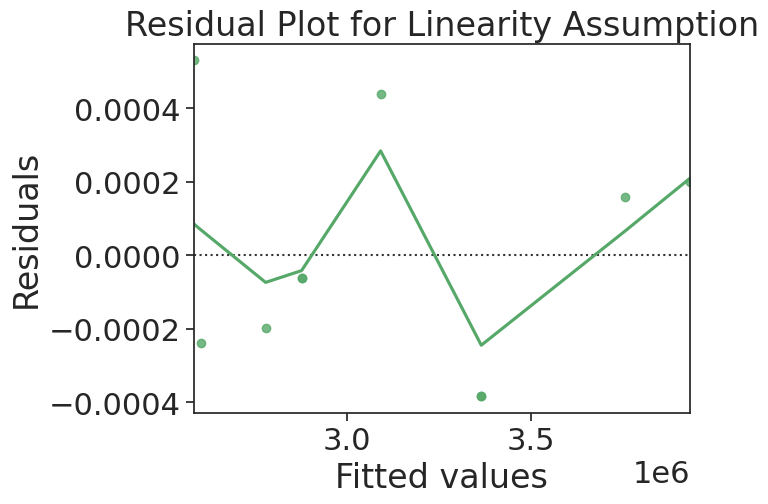

In [ ]:
# Uji Asumsi Linearitas

import matplotlib.pyplot as plt

residuals = model.resid

sns.residplot(x=model.predict(X), y=residuals, lowess=True, color="g")
plt.title('Residual Plot for Linearity Assumption')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

# Membuat model regresi linear
model = sm.OLS(y, X).fit()

# Melakukan uji Rainbow
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow Statistic: {rainbow_statistic}\nP-value: {rainbow_p_value}')

Rainbow Statistic: 1.9936049848428328
P-value: 0.36690836440458696


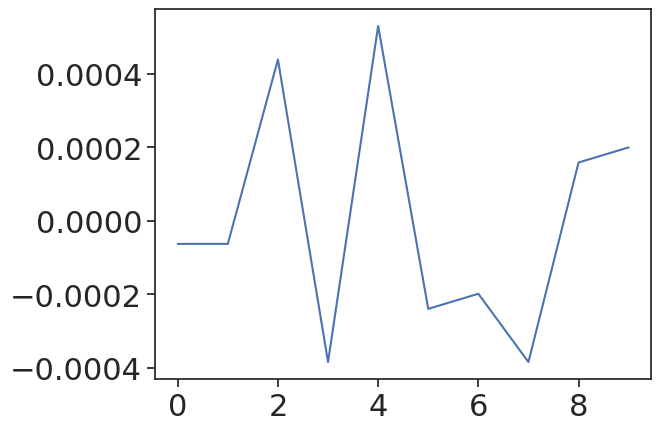

In [ ]:
plt.plot(residuals.index, residuals)